# **Survival Analysis of the Veteran Dataset**

This notebook analyzes the **veteran** dataset from the `survival` package.  
We will perform:

- Descriptive analysis with plots  
- Hypothesis testing  
- A simple predictive model (linear regression)  

---


In [1]:
# Install required packages if missing
if (!requireNamespace("survival", quietly = TRUE)) {
  install.packages("survival")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}

library(survival)
library(dplyr)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




## **Load and Prepare Data**

We will load the **veteran dataset**, then recode variables for clarity:
- `prior`: TRUE/FALSE instead of numeric  
- `trt`: factor with labels ("standard", "test")  
- `status`: TRUE/FALSE (event occurred or censored)  


In [2]:
data(survival::veteran)

my_veteran <- veteran %>% 
  mutate(prior = ifelse(prior == 0, FALSE, TRUE)) %>%
  mutate(trt = factor(trt, levels = c(1, 2), 
                      labels = c("standard", "test"))) %>%
  mutate(status = ifelse(status == 0, FALSE, TRUE))

summary(my_veteran)
str(my_veteran)

Warning message in data(survival::veteran):
“data set ‘survival::veteran’ not found”


       trt          celltype       time         status            karno      
 standard:69   squamous :35   Min.   :  1.0   Mode :logical   Min.   :10.00  
 test    :68   smallcell:48   1st Qu.: 25.0   FALSE:9         1st Qu.:40.00  
               adeno    :27   Median : 80.0   TRUE :128       Median :60.00  
               large    :27   Mean   :121.6                   Mean   :58.57  
                              3rd Qu.:144.0                   3rd Qu.:75.00  
                              Max.   :999.0                   Max.   :99.00  
    diagtime           age          prior        
 Min.   : 1.000   Min.   :34.00   Mode :logical  
 1st Qu.: 3.000   1st Qu.:51.00   FALSE:97       
 Median : 5.000   Median :62.00   TRUE :40       
 Mean   : 8.774   Mean   :58.31                  
 3rd Qu.:11.000   3rd Qu.:66.00                  
 Max.   :87.000   Max.   :81.00                  

'data.frame':	137 obs. of  8 variables:
 $ trt     : Factor w/ 2 levels "standard","test": 1 1 1 1 1 1 1 1 1 1 ...
 $ celltype: Factor w/ 4 levels "squamous","smallcell",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ time    : num  72 411 228 126 118 10 82 110 314 100 ...
 $ status  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ karno   : num  60 70 60 60 70 20 40 80 50 70 ...
 $ diagtime: num  7 5 3 9 11 5 10 29 18 6 ...
 $ age     : num  69 64 38 63 65 49 69 68 43 70 ...
 $ prior   : logi  FALSE TRUE FALSE TRUE TRUE FALSE ...


## **Descriptive Analysis**

We now explore the dataset with tables and plots:
- Treatment distribution  
- Cell type distribution  
- Survival time (boxplot & histogram)  
- Censoring status  
- Karnofsky score  
- Diagnosis time  
- Age  
- Prior treatment  


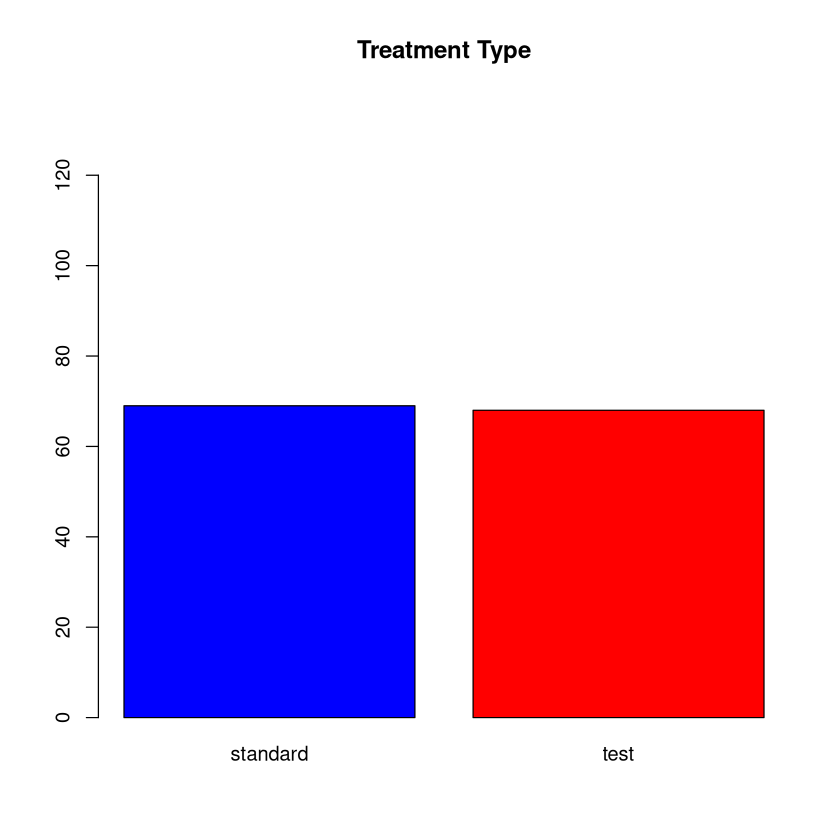

In [3]:
# Treatment
my_trt <- table(my_veteran$trt)
barplot(my_trt, ylim = c(0, 137), col = c('blue', 'red'), main = "Treatment Type")

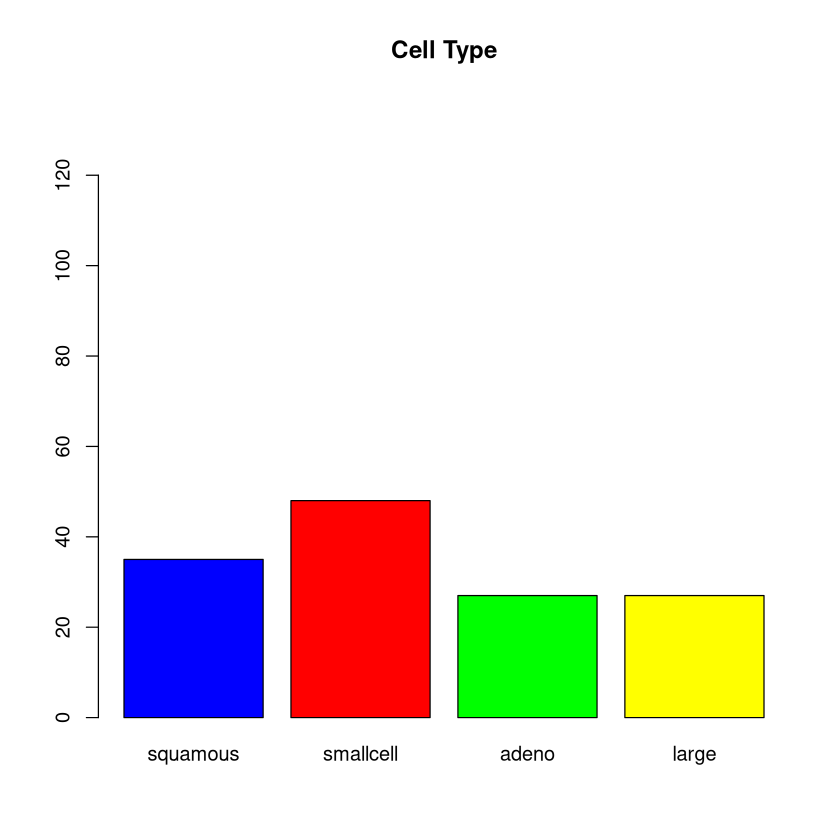

In [4]:
# Celltype
my_celltype <- table(my_veteran$celltype)
barplot(my_celltype, ylim = c(0, 137), col = c('blue', 'red', 'green', 'yellow'),
        main = "Cell Type")

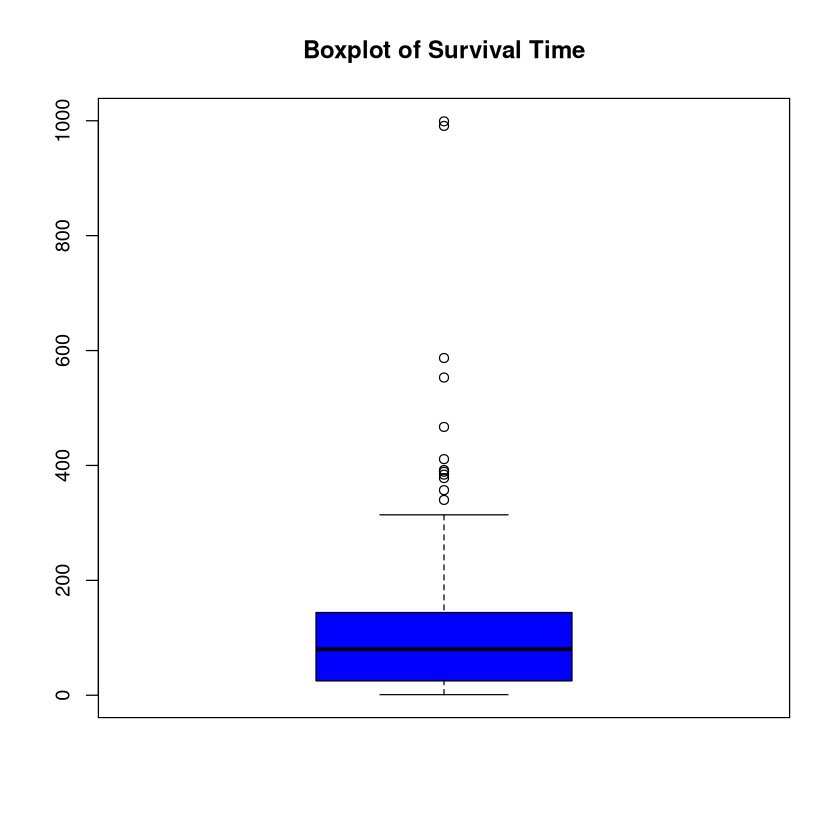

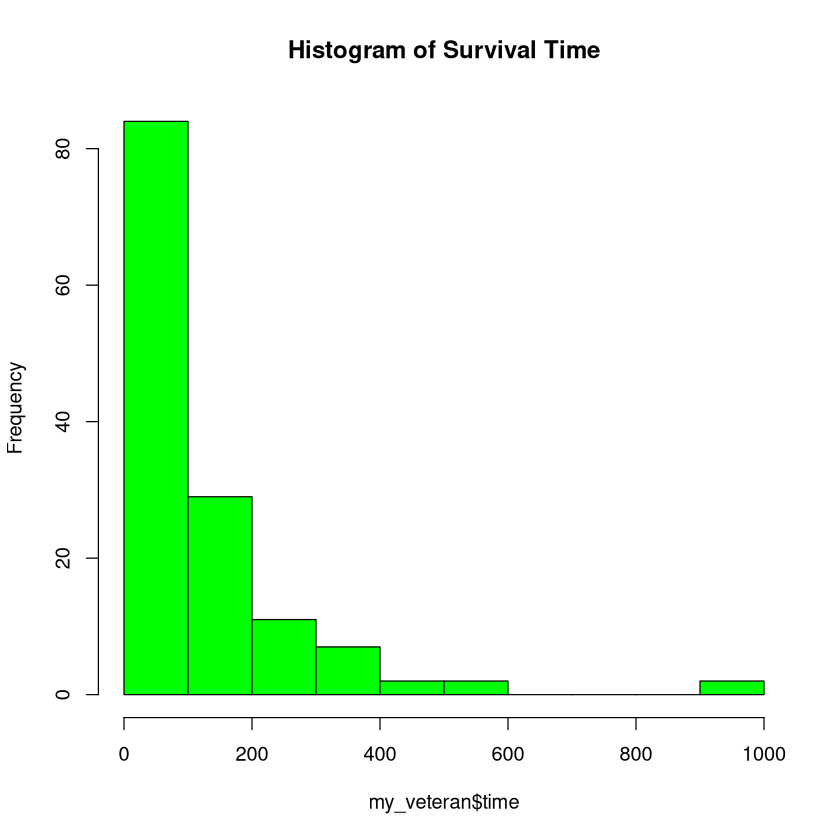

In [5]:
# Survival Time
boxplot(my_veteran$time, col = 'blue', main = "Boxplot of Survival Time")
hist(my_veteran$time, col = 'green', main = "Histogram of Survival Time")

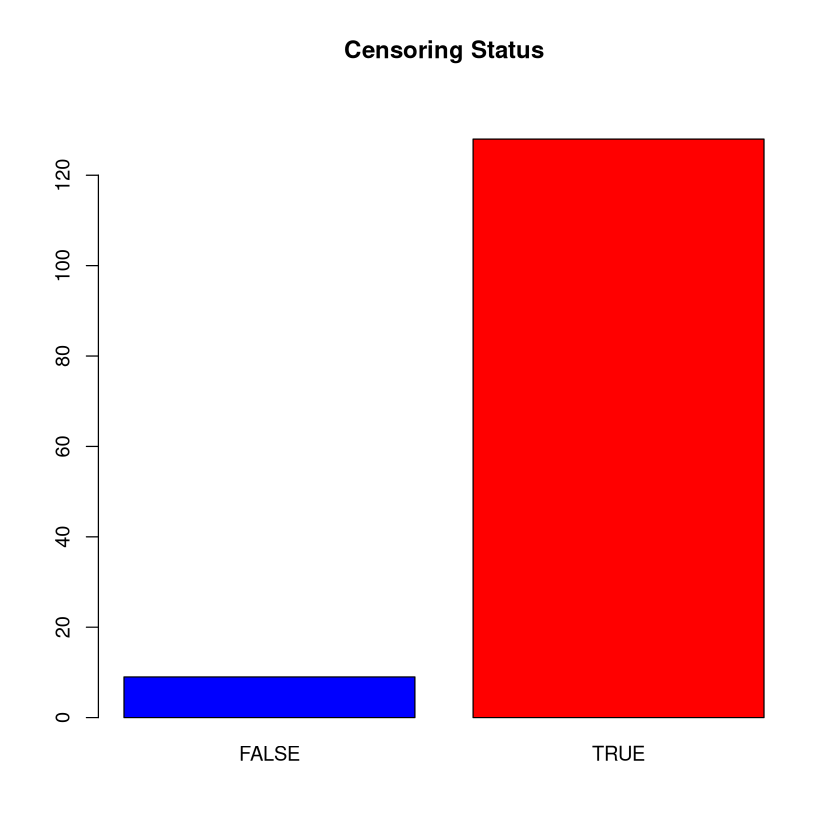

In [6]:
# Status
my_status <- table(my_veteran$status)
barplot(my_status, ylim = c(0, 137), col = c('blue', 'red'), main = "Censoring Status")

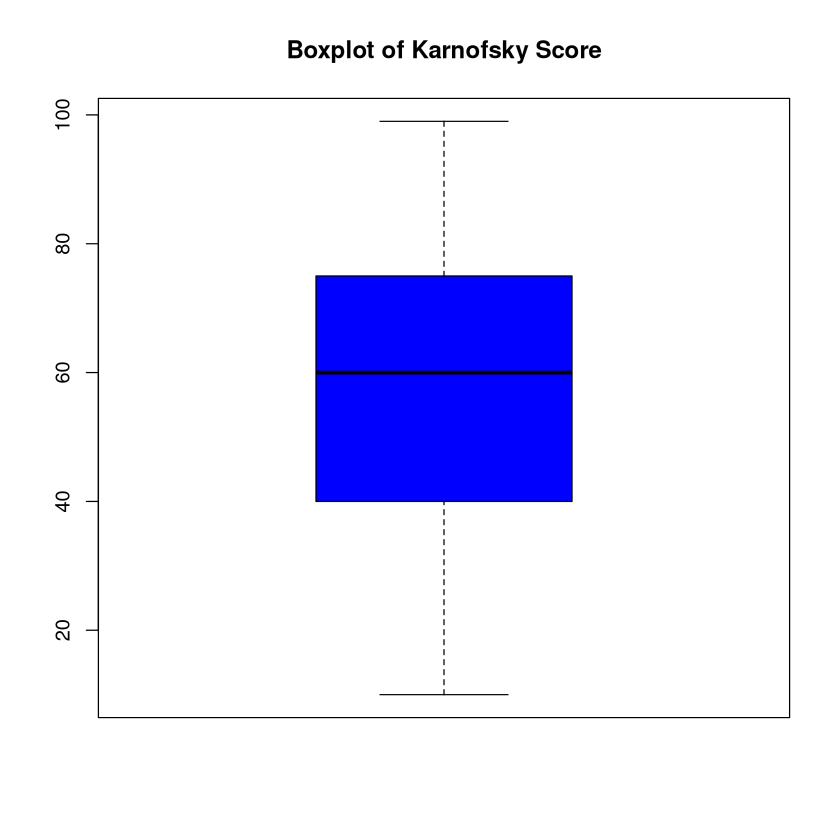

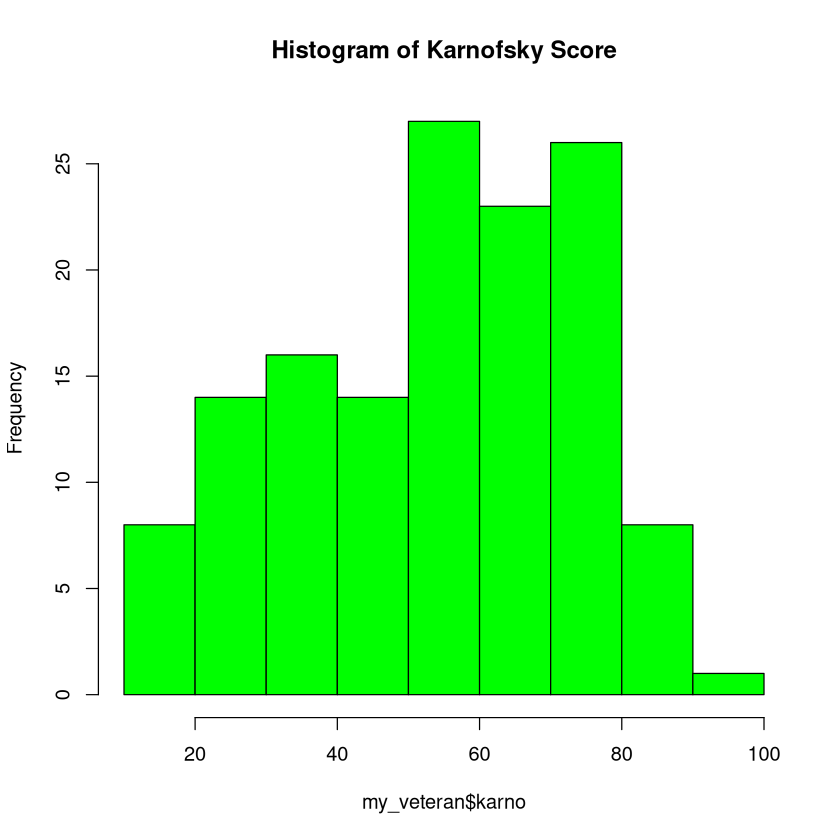

In [7]:
# Karnofsky Score
boxplot(my_veteran$karno, col = 'blue', main = "Boxplot of Karnofsky Score")
hist(my_veteran$karno, col = 'green', main = "Histogram of Karnofsky Score")

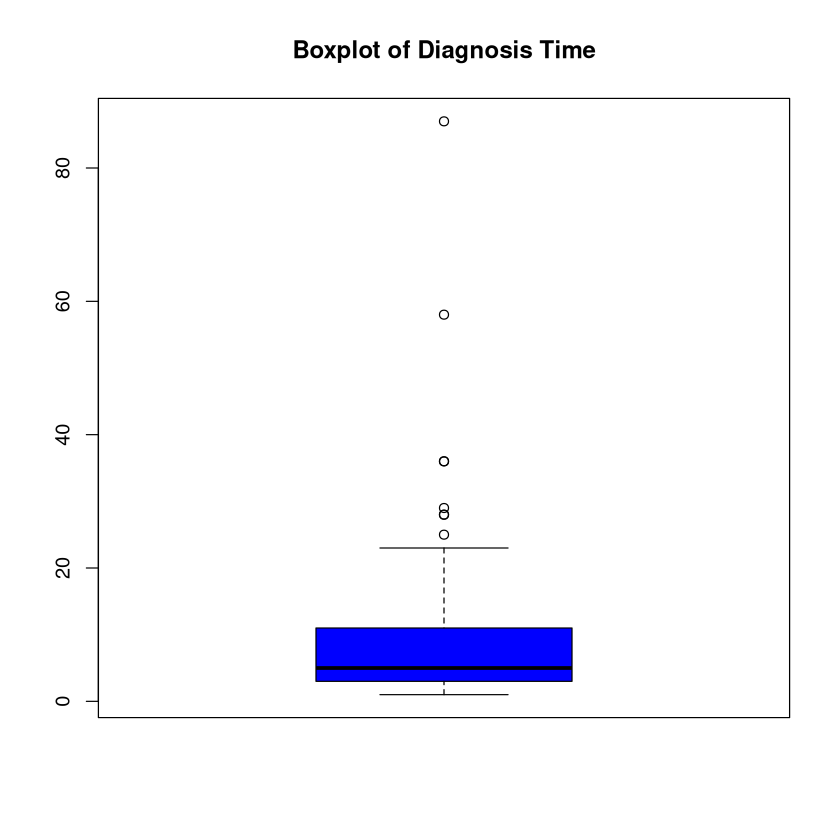

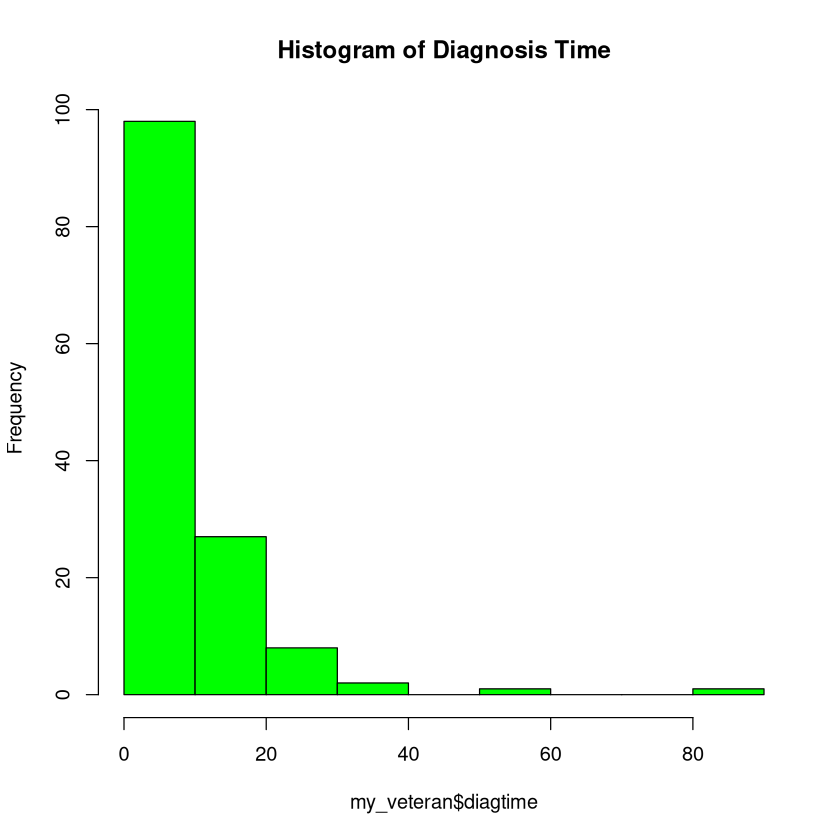

In [8]:
# Diagnosis Time
boxplot(my_veteran$diagtime, col = 'blue', main = "Boxplot of Diagnosis Time")
hist(my_veteran$diagtime, col = 'green', main = "Histogram of Diagnosis Time")

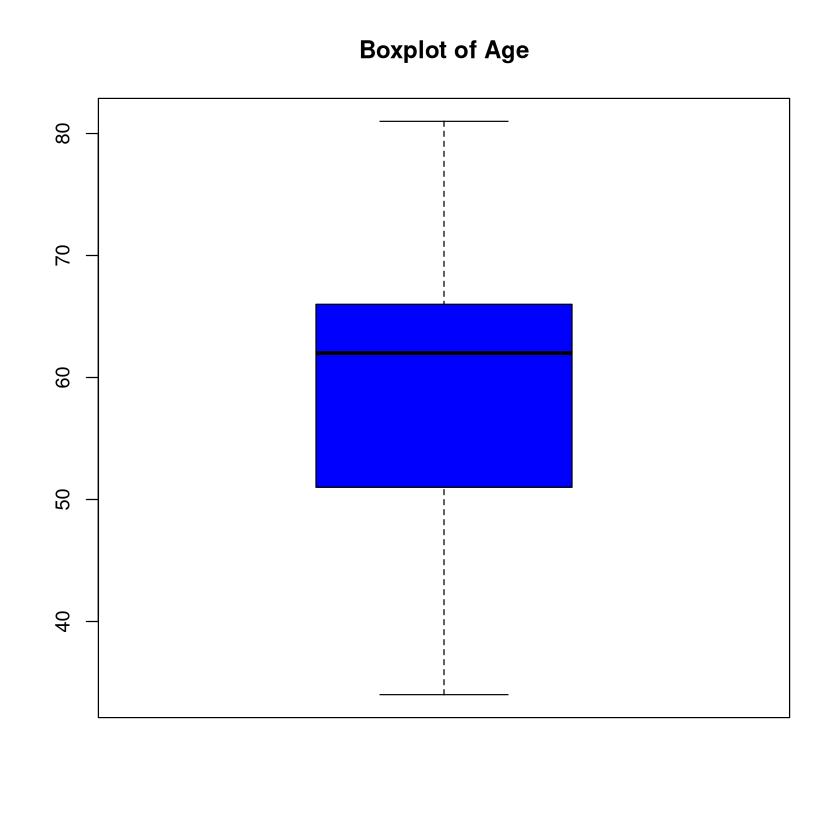

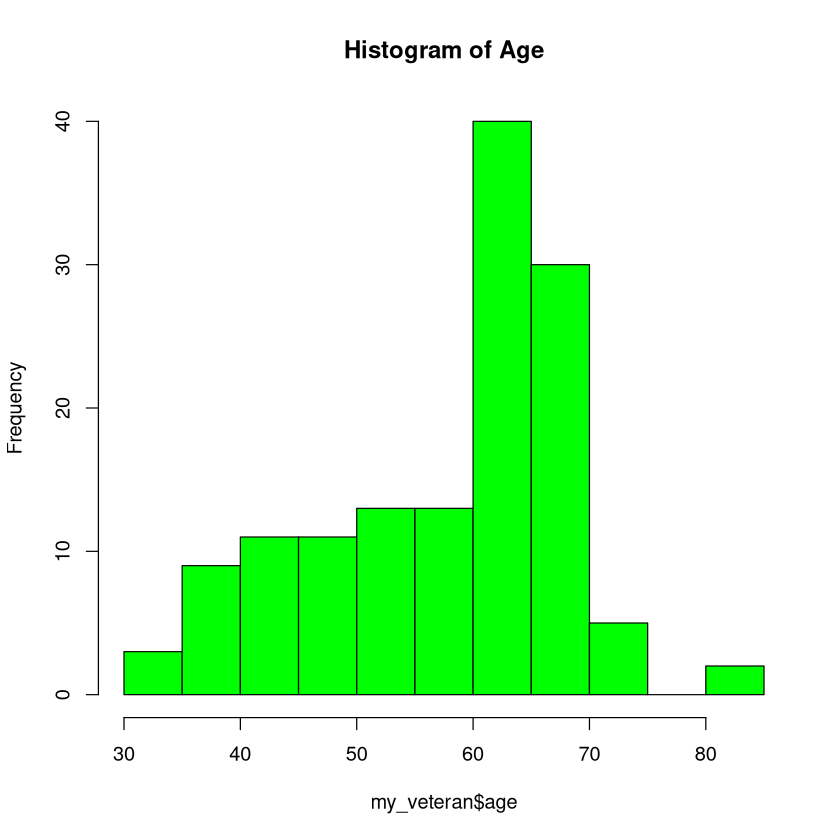

In [9]:
# Age
boxplot(my_veteran$age, col = 'blue', main = "Boxplot of Age")
hist(my_veteran$age, col = 'green', main = "Histogram of Age")

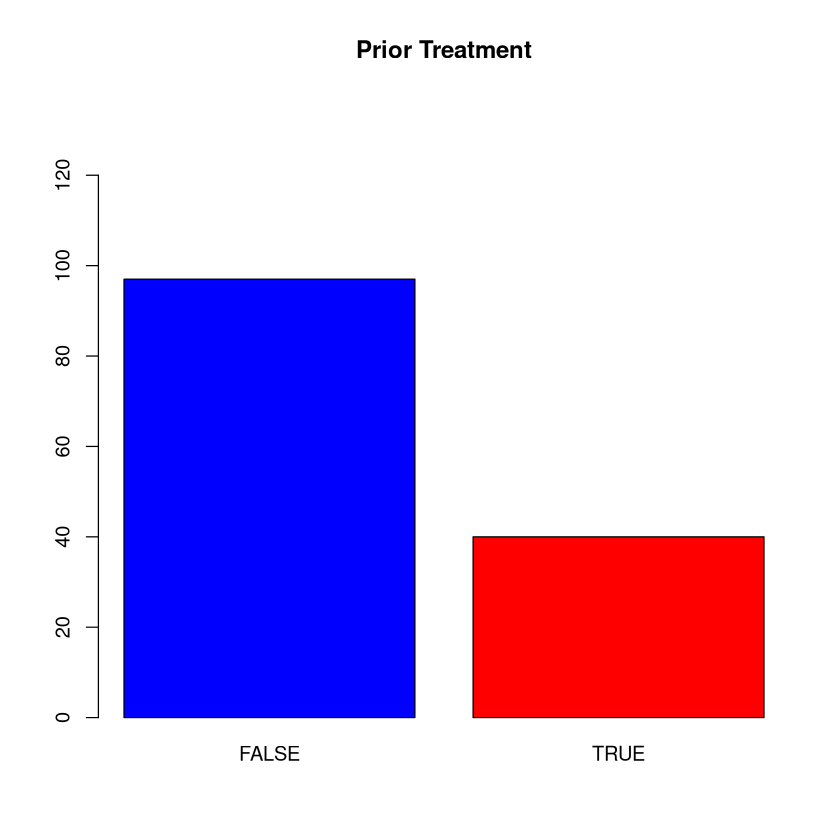

In [10]:
# Prior Treatment
my_prior <- table(my_veteran$prior)
barplot(my_prior, ylim = c(0, 137), col = c('blue', 'red'), main = "Prior Treatment")

## **Hypothesis Testing**

1. **Chi-square test**: Is treatment type dependent on prior treatment?  
2. **t-test**: Compare survival time between treatments (standard vs test).  
3. **t-test**: Compare survival time between patients with and without prior therapy.  
4. **Correlation test**: Pearson correlation between Karnofsky score and age.  


In [11]:
# Treatment vs Prior
trt_prior <- table(my_veteran$trt, my_veteran$prior)
chisq.test(trt_prior)


	Pearson's Chi-squared test with Yates' continuity correction

data:  trt_prior
X-squared = 0.017702, df = 1, p-value = 0.8942


In [12]:
# Survival Time vs Treatment
t.test(my_veteran$time[my_veteran$trt == 'standard'],
       my_veteran$time[my_veteran$trt == 'test'])


	Welch Two Sample t-test

data:  my_veteran$time[my_veteran$trt == "standard"] and my_veteran$time[my_veteran$trt == "test"]
t = -0.48121, df = 107.37, p-value = 0.6313
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -66.86460  40.74269
sample estimates:
mean of x mean of y 
 115.1449  128.2059 


In [13]:
# Survival Time vs Prior
t.test(my_veteran$time[my_veteran$prior == TRUE],
       my_veteran$time[my_veteran$prior == FALSE])


	Welch Two Sample t-test

data:  my_veteran$time[my_veteran$prior == TRUE] and my_veteran$time[my_veteran$prior == FALSE]
t = 0.87013, df = 48.959, p-value = 0.3885
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -42.48925 107.37997
sample estimates:
mean of x mean of y 
 144.6000  112.1546 


In [14]:
# Correlation: Karnofsky vs Age
cor.test(my_veteran$karno, my_veteran$age, method = "pearson")


	Pearson's product-moment correlation

data:  my_veteran$karno and my_veteran$age
t = -1.1086, df = 135, p-value = 0.2696
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.25858099  0.07390807
sample estimates:
        cor 
-0.09498481 


## **Predictive Model**

We fit a **linear regression** model:

- Response: `karno` (Karnofsky score)  
- Predictor: `age`  

We then check residuals and make predictions.  


In [15]:
karno <- my_veteran$karno
age <- my_veteran$age

model <- lm(karno ~ age)
summary(model)


Call:
lm(formula = karno ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.472 -16.819   2.278  17.042  40.195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.0975     9.6493   7.161 4.67e-11 ***
age          -0.1806     0.1629  -1.109     0.27    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.02 on 135 degrees of freedom
Multiple R-squared:  0.009022,	Adjusted R-squared:  0.001682 
F-statistic: 1.229 on 1 and 135 DF,  p-value: 0.2696


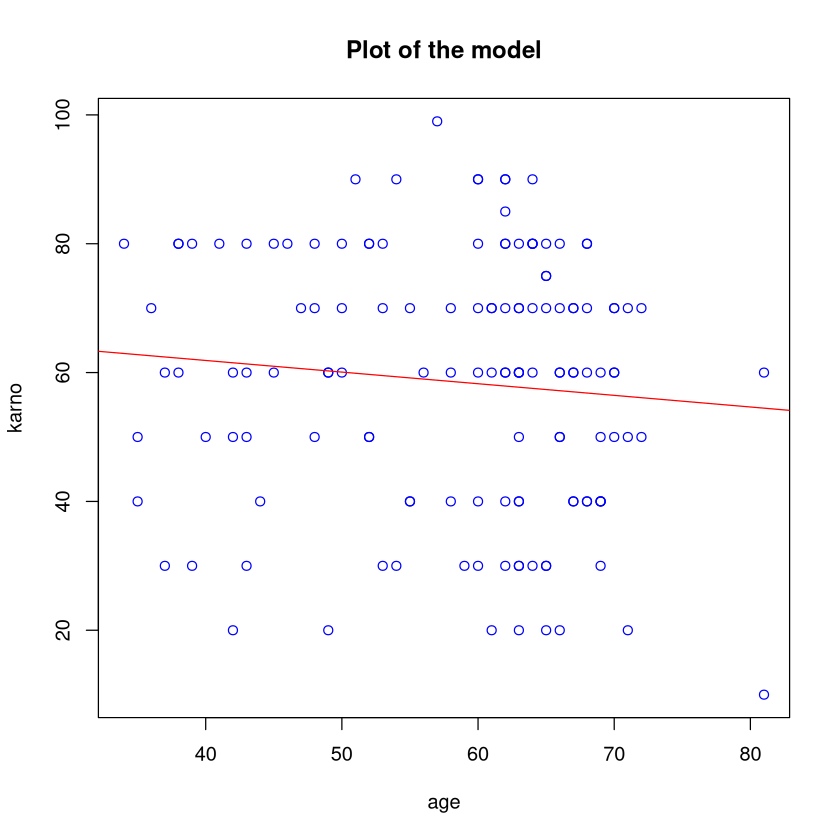

In [16]:
# Plot model
plot(age, karno, col = 'blue', main = "Plot of the model")
abline(model, col = 'red')

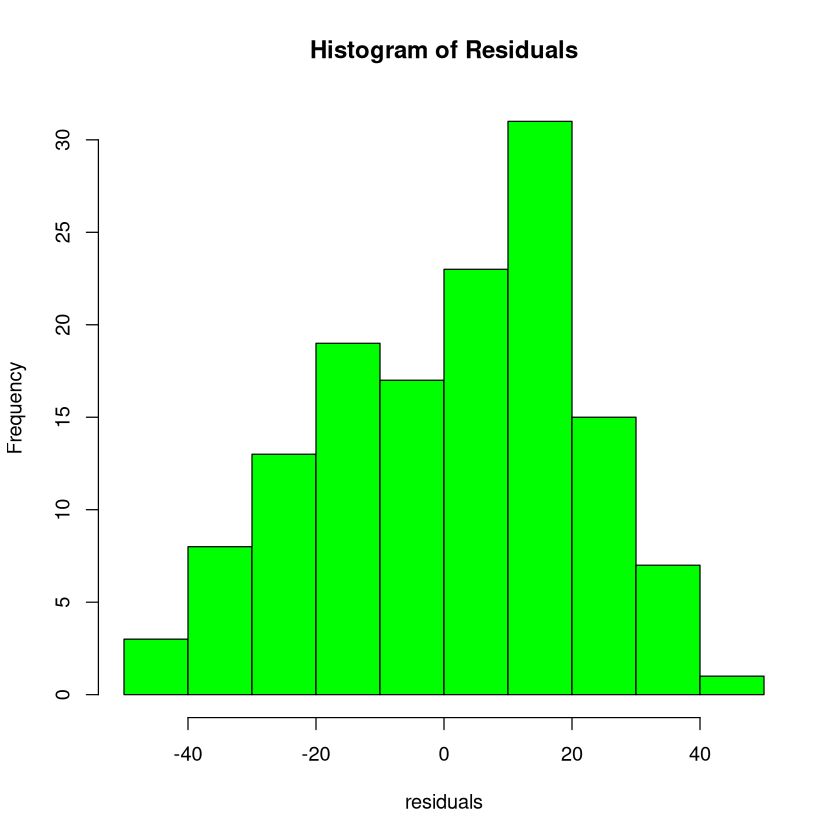

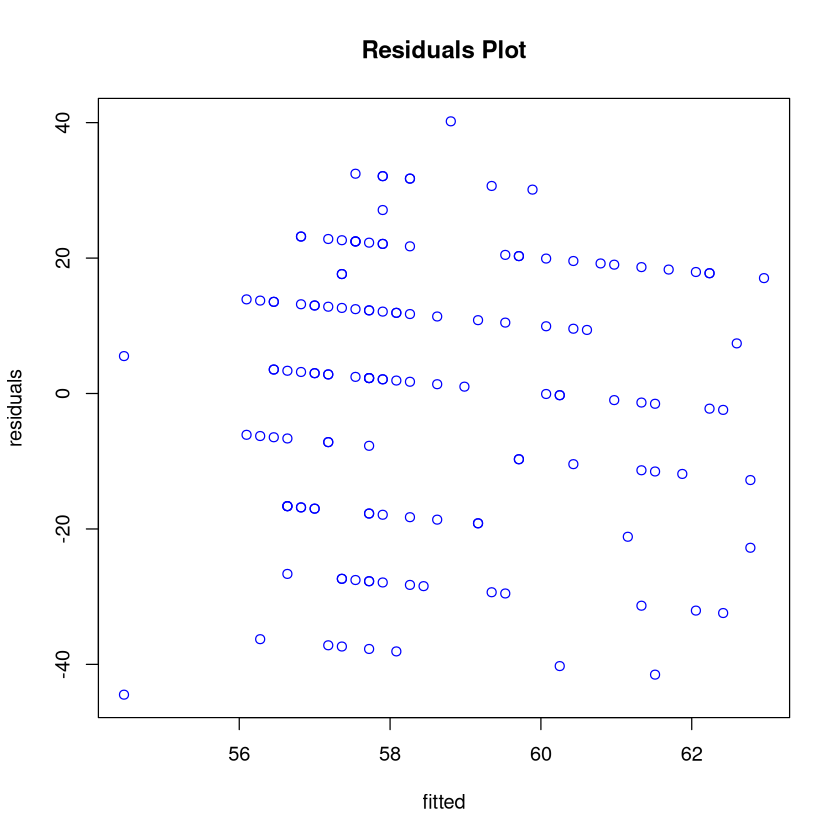

In [17]:
# Residuals
residuals <- resid(model)
fitted <- fitted(model)

hist(residuals, col = 'green', main = "Histogram of Residuals")
plot(fitted, residuals, col = 'blue', main = "Residuals Plot")

In [18]:
# Normality test of residuals
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.96375, p-value = 0.00106


In [19]:
# Prediction for new age value
n_date <- data.frame(age = 68)
predict(model, n_date, interval = "predict", level = 0.95)

,fit,lwr,upr
1,56.81904,16.95351,96.68457
